In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import (
    Dropout,
    Input,
    Flatten,
    Dense,
    Conv2D,
    MaxPooling2D,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = "DS"  # FIXME
validation_data_dir = "val"  # FIXME

# number of samples used for determining the samples_per_epoch
nb_train_samples = 160
nb_validation_samples = 24
epochs = 20
batch_size = 5

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # normalize pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)


val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # normalize pixel values to [0,1]

np.random.seed(42)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
)

Found 160 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [39]:
classifier = Sequential()
classifier.add(Input(shape=(150, 150, 3)))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1, activation="sigmoid"))

In [40]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = classifier.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=5,
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6428 - loss: 0.9907 - val_accuracy: 0.5000 - val_loss: 0.7521
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.3092 - loss: 0.9402 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4203 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4900 - loss: 0.7103 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.4459 - loss: 0.7053 - val_accuracy: 0.3750 - val_loss: 0.6939


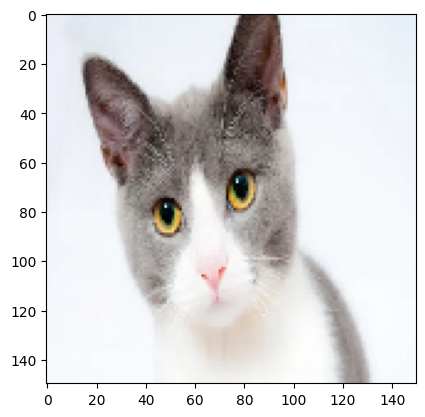

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted: [[0.72497326]] cat


In [41]:
# dimensions of our images.
img_width, img_height = 150, 150

img_path = "cat-pet-animal-domestic-104827.jpeg" # FIXME
img = tf.keras.utils.load_img(img_path, target_size=(img_width, img_height))
plt.imshow(img)
plt.show()

img_arr = tf.keras.utils.img_to_array(img)
x = np.expand_dims(img_arr, axis=0)
score = classifier.predict(x)
print("Predicted:", score, "cat" if score > 0.5 else "dog")

In [42]:
x.shape

(1, 150, 150, 3)